In [9]:
import pandas as pd

def create_kto_data(yy,mm):
    #1. assign file-path
    file_path = './files/kto_{}{}.xlsx'.format(yy,mm)
    
    #2. read file
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    #3. add '기준년월' column
    df['기준년월'] = '{}-{}'.format(yy,mm)
    
    #4. remove continents out of '국적'column, leave only nations
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'] #names to be removed
    conditions = (df['국적'].isin(ignore_list) == False)  #fall out continents
    df_country = df[conditions].reset_index(drop=True)   ####
    
    #5. add '대륙' column
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] *23 + ['오세아니아'] * 3 \
            +['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    #6. add '관광객비율(%)' column
    df_country['관광객비율(%)'] = round(df_country.관광/df_country.계 *100, 1)
    
    #7. add ''전체비율(%) column
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광']/tourist_sum *100, 1)
    
    #8. return result
    return(df_country)

In [10]:
kto_test = create_kto_data(2018,12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [16]:
df = pd.DataFrame()
for yy in range(2010,2021):
    for mm in range(1,13):
        mm_str = str(mm).zfill(2)
        # zfill(2) 두자리 해놓고 비는곳에 0채워줌(zerofill)
        
        try : 
            temp = create_kto_data(str(yy), mm_str)
            df =df.append(temp, ignore_index=True)
            
        except:
            pass
        
        print(yymm)

202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012
202012


In [19]:
df.head(20)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
5,말레이시아,3292,61,0,49,1157,4559,2010-01,아시아,72.2,0.8
6,필리핀,3984,219,104,87,16820,21214,2010-01,아시아,18.8,1.0
7,인도네시아,1840,327,3,65,2826,5061,2010-01,아시아,36.4,0.5
8,싱가포르,4201,120,3,27,1017,5368,2010-01,아시아,78.3,1.0
9,미얀마,630,18,54,10,3882,4594,2010-01,아시아,13.7,0.2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [20]:
df.to_excel('./files/kto_total.xlsx', index=False)

In [21]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
317,중국,87080,12375,293,3293,47078,150119,2010-06,아시아,58.0,16.7
377,중국,122432,10608,239,4309,57600,195188,2010-07,아시아,62.7,22.6
437,중국,142180,11049,232,26427,62099,241987,2010-08,아시아,58.8,24.5
497,중국,93545,10013,293,11374,60971,176196,2010-09,아시아,53.1,17.1
557,중국,107237,11371,374,3102,59344,181428,2010-10,아시아,59.1,16.3


In [22]:
file_path = './files/[국적별]china.xlsx'
df_filter.to_excel(file_path, index=False)


In [23]:
cntry_list = df['국적'].unique()
cntry_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [25]:
len(cntry_list)

60

In [26]:
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    file_path = './files/[국적별]{}.xlsx'.format(cntry)
    
    df_filter.to_excel(file_path, index=False)
        

In [31]:
## 시각화 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns              #! pip install seaborn

df = pd.read_excel('./files/kto_total.xlsx')
df.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [32]:
#한글표기 위해 글꼴 변경
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else: 
    print('Check Your OS system.')

In [33]:
df_filter = df[df['국적']=='중국']
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


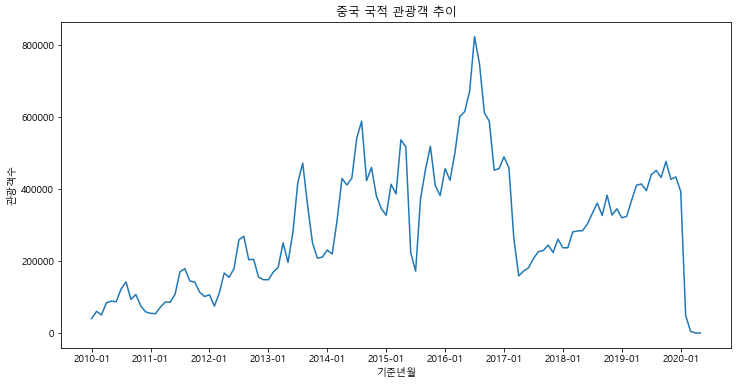

In [38]:
# size of graph
plt.figure(figsize = (12,6))
# contents of graph
plt.plot(df_filter['기준년월'], df_filter['관광'])

# title, x, y
plt.title('중국 국적 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금값 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'])


plt.show()

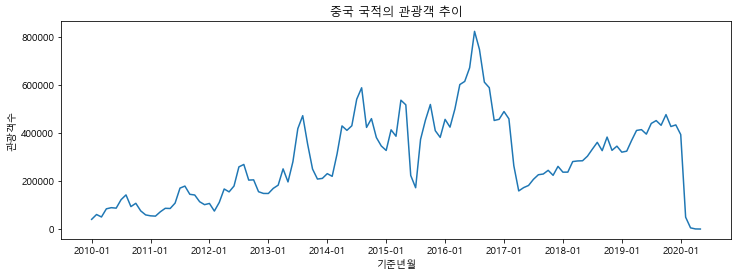

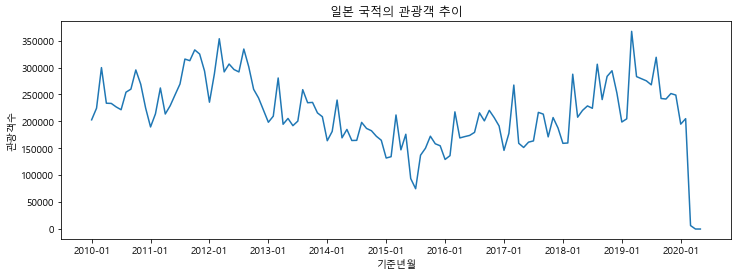

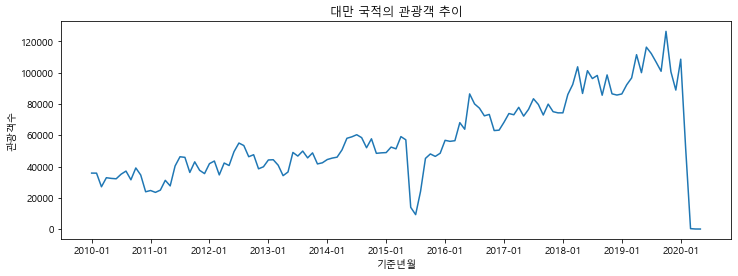

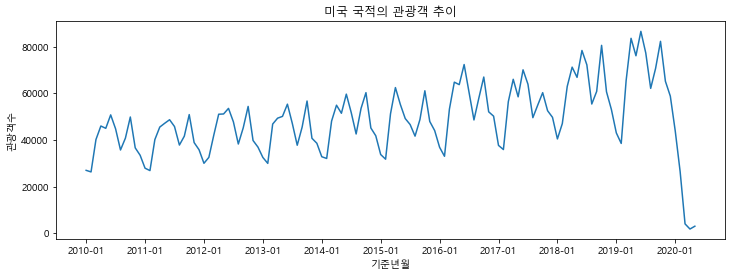

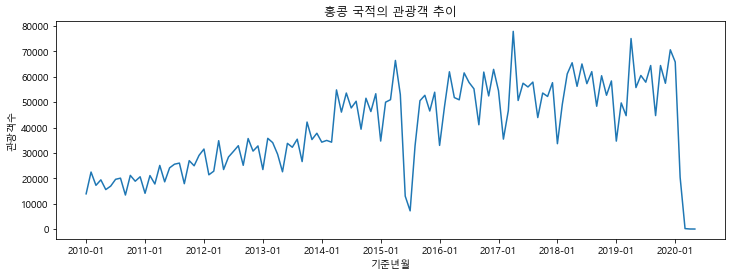

In [39]:
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']
for cntry in cntry_list: 
    #국적관광객 추출 
    condition = (df['국적']==cntry)
    df_filter = df[condition]
    
    # 그래프 그리기
    ## 그래프 크기 
    plt.figure(figsize=(12,4))
    
    ##그래프 내용
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    ##x축 y축 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    ##x축 눈금값
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'])
    
    #출력
    plt.show()